In [80]:
import pandas as pd
cancer = pd.read_csv('../Cases/Wisconsin/BreastCancer.csv')
cancer.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [81]:
X = cancer.drop(['Code', 'Class'], axis=1)
y = cancer['Class']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [26]:
# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dct = DecisionTreeClassifier(random_state=24, max_depth=2)
dct.fit(X_train, y_train)
y_pred = dct.predict(X_test)
accuracy_score(y_test, y_pred)

0.9571428571428572

In [53]:
import numpy as np
depths = np.arange(1,11)
scores = []

for i in depths:
    dct = DecisionTreeClassifier(random_state=24, max_depth=i)
    dct.fit(X_train, y_train)
    y_pred = dct.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

#### Good max depth

In [54]:
print(depths[np.argmax(scores)])

2


#### Best Score for the good max depth

In [55]:
np.max(scores)

0.9571428571428572

In [63]:
y.value_counts()

Class
Benign       458
Malignant    241
Name: count, dtype: int64

**Naive Model Prediction**: Assigning every label as belonging to majority class

Accuracy Score of any Machine Learning Model should be bigger than accuracy score from Naive Model Prediction.

### Tuning the model with F1-score

In [75]:
from sklearn.metrics import f1_score
import numpy as np
depths = np.arange(1,11)
f1_scores = []

for i in depths:
    dct = DecisionTreeClassifier(random_state=24, max_depth=i)
    dct.fit(X_train, y_train)
    y_pred = dct.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, pos_label='Malignant'))

In [76]:
print('Good no for max_depth : ', depths[np.argmax(f1_scores)])
print('F1_score : ', np.max(f1_scores))

Good no for max_depth :  2
F1_score :  0.9403973509933775


### Exploring more params of decision tree

In [85]:
max_depths = [2,3,4,None]
min_samples_splits = [2,5,10,50]
min_samples_leafs = [1,5,20]
f1_scores = []

for i in max_depths:
    for j in min_samples_splits:
        for k in min_samples_leafs:
            dct = DecisionTreeClassifier(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dct.fit(X_train, y_train)
            y_pred = dct.predict(X_test)
            f1_scores.append([i, j, k, f1_score(y_test, y_pred, pos_label='Malignant')])

df_f1_scores = pd.DataFrame(f1_scores, columns=['Max_Depth', 'Min_Samples_Split', 'Min_Samples_leaf', 'F1_Score'])
df_f1_scores.sort_values('F1_Score', ascending=False).iloc[0]

Max_Depth            2.000000
Min_Samples_Split    2.000000
Min_Samples_leaf     1.000000
F1_Score             0.940397
Name: 0, dtype: float64

In [86]:
best_dct = DecisionTreeClassifier(random_state=24, max_depth=2, min_samples_split=2, min_samples_leaf=1)
best_dct.fit(X_train, y_train)
y_pred = best_dct.predict(X_test)

[Text(0.5, 0.8333333333333334, 'x[1] <= 3.5\ngini = 0.452\nsamples = 489\nvalue = [320, 169]'),
 Text(0.25, 0.5, 'x[5] <= 4.5\ngini = 0.143\nsamples = 335\nvalue = [309, 26]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.056\nsamples = 312\nvalue = [303, 9]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(0.75, 0.5, 'x[1] <= 4.5\ngini = 0.133\nsamples = 154\nvalue = [11, 143]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.375\nsamples = 32\nvalue = [8, 24]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.048\nsamples = 122\nvalue = [3, 119]')]

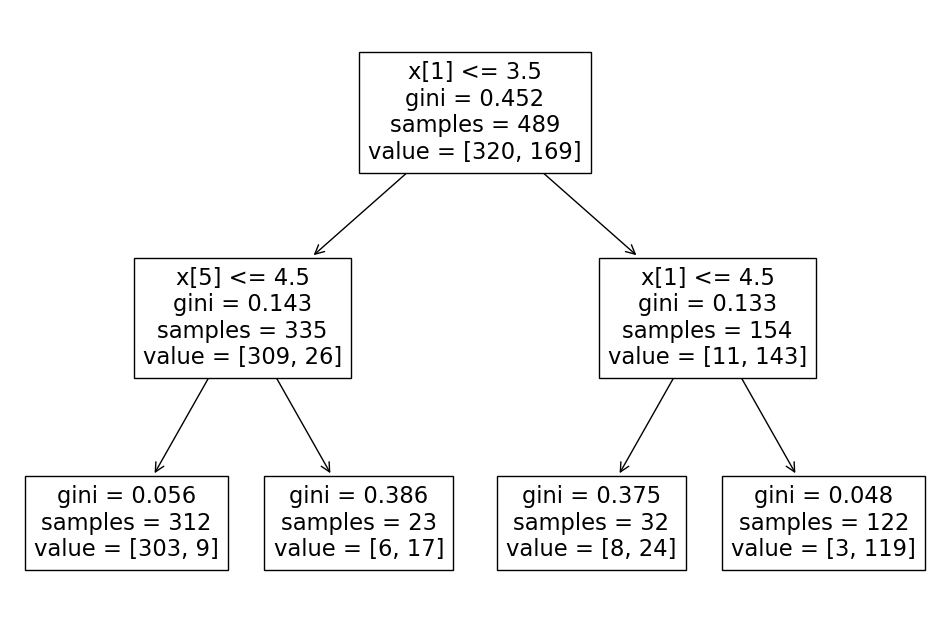

In [90]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(best_dct)          

### Human Resources dataset

In [92]:
hr = pd.read_csv('../Cases/human-resources-analytics/HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [93]:
hr.isna().sum().sum()

0

In [96]:
X, y = hr.drop('left', axis=1), hr['left']
X = pd.get_dummies(X)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

### Best MaxDepth, MinSampleSplit, MinSampleLeaf for best Accuracy

In [108]:
max_depths = [2,3,5,None]
min_samples_splits = [2,10,100, 1000]
min_samples_leafs = [1,50,100, 200]
scores = []

for i in max_depths:
    for j in min_samples_splits:
        for k in min_samples_leafs:
            dct = DecisionTreeClassifier(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dct.fit(X_train, y_train)
            y_pred = dct.predict(X_test)
            f1_scores.append([i, j, k, f1_score(y_test, y_pred, pos_label=1), accuracy_score(y_test, y_pred)])

df_scores = pd.DataFrame(f1_scores, columns=['Max_Depth', 'Min_Samples_Split', 'Min_Samples_leaf', 'F1_Score', 'Accuracy'])
df_scores.sort_values('Accuracy', ascending=False).iloc[0]

Max_Depth                   NaN
Min_Samples_Split    100.000000
Min_Samples_leaf       1.000000
F1_Score               0.986081
Accuracy               0.978440
Name: 168, dtype: float64

In [109]:
df_scores.sort_values('F1_Score', ascending=False).iloc[0]

Max_Depth                   NaN
Min_Samples_Split    100.000000
Min_Samples_leaf       1.000000
F1_Score               0.986081
Accuracy               0.978440
Name: 168, dtype: float64

In [107]:
y.value_counts()

left
0    11428
1     3567
Name: count, dtype: int64

### Inferencing

In [121]:
train = hr
X, y = train.drop('left', axis=1), train['left']
X = pd.get_dummies(X)
test = pd.read_csv('../Cases/human-resources-analytics/tst_hr.csv')
test = pd.get_dummies(test) # Encoding the test data

In [122]:
# Model builidng
best_dct = DecisionTreeClassifier(random_state=24, max_depth=None, min_samples_split=100, min_samples_leaf=1)
best_dct.fit(X, y)

DecisionTreeClassifier(min_samples_split=100, random_state=24)

In [123]:
y_pred = best_dct.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Department_IT
- Department_RandD
- Department_accounting
- Department_hr
- Department_management
- ...


#### The feature names are not matching to those that were passed during fit.

In [126]:
test.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.11,0.88,7,272,4,0,0,True,False,False,False,False,True


In [127]:
X.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False


### Trying Label Encoder

In [139]:
train = hr
X, y = train.drop('left', axis=1), train['left']
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X['Department'] = le1.fit_transform(X['Department'])
le2 = LabelEncoder()
X['salary'] = le2.fit_transform(X['salary'])

test = pd.read_csv('../Cases/human-resources-analytics/tst_hr.csv')
test['Department'] = le1.transform(test['Department'])
test['salary'] = le2.transform(test['salary'])


In [137]:
train.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [136]:
test.Department.unique()

array(['sales', 'technical', 'support'], dtype=object)

In [140]:
# Model builidng
best_dct = DecisionTreeClassifier(random_state=24, max_depth=None, min_samples_split=100, min_samples_leaf=1)
best_dct.fit(X, y)
y_pred = best_dct.predict(test)

In [141]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)